In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
import datetime as dt

In [2]:
# file path
filepath = '../Resources/cleanedCaseSurveillance.csv'

# Reading CSV File
org_data_df = pd.read_csv(filepath)
org_data_df

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
3,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
4,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
...,...,...,...,...,...,...,...
991891,2020/06/10,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,Yes,Yes
991892,2020/06/08,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Yes
991893,2020/06/10,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Yes
991894,2020/06/01,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,No


,Pre-Existing,Non-Existing
Male,"259,987","204,863"
Female,"299,876","227,161"


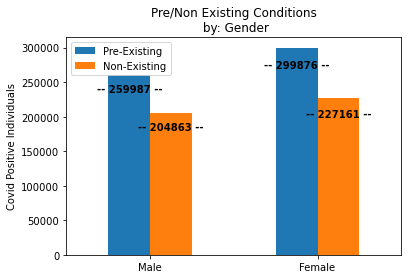

In [3]:
hosp_y = len(org_data_df.loc[(org_data_df["Pre-Existing Condition"] == "Yes")])
hosp_n = len(org_data_df.loc[(org_data_df["Pre-Existing Condition"] == "No")])

male_pre = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Pre-Existing Condition"] == "Yes")])
female_pre = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Pre-Existing Condition"] == "Yes")])

male_nopre = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Pre-Existing Condition"] == "No")])
female_nopre = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Pre-Existing Condition"] == "No")])

gender = ["Male", "Female"]
prex_df = pd.DataFrame({"Pre-Existing": [male_pre, female_pre], "Non-Existing" : [male_nopre, female_nopre]}, index = gender)
ax = prex_df.plot(kind='bar', rot=0) 
ax.set_ylabel("Covid Positive Individuals")
ax.set_title("Pre/Non Existing Conditions\n by: Gender")
ax.legend(loc = "upper left")
plt.annotate(f"-- {male_pre} --", xy=(0,253000), xytext=(-0.32,235000),color = "black", weight = "bold")
plt.annotate(f"-- {female_pre} --",xy=(0,300000), xytext=(.68,270000), color = "black", weight = "bold")
plt.annotate(f"-- {male_nopre} --", xy = (0,300000), xytext = (-0.07,180000), color = "black", weight = "bold")
plt.annotate(f"-- {female_nopre} --", xy = (0,230000), xytext = (.93, 200000), color = "black", weight = "bold")
plt.savefig("../Images/ConditionsByGender.png")
prex_df.style.format("{:,.0f}")

,Hospitalized,Not Hospitalized
Male,"91,825","373,025"
Female,"82,089","444,948"


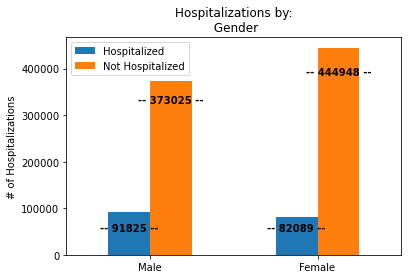

In [4]:
male_hy = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Hospitalized"] == "Yes")])
female_hy = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Hospitalized"] == "Yes")])
male_hn = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Hospitalized"] == "No")])
female_hn = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Hospitalized"] == "No")])

hosp_df = pd.DataFrame({"Hospitalized" : [male_hy, female_hy], "Not Hospitalized" : [male_hn, female_hn]}, index = gender)
ax = hosp_df.plot(kind='bar', rot=0) 
ax.set_ylabel("# of Hospitalizations")
ax.set_title("Hospitalizations by:\n Gender")

ax.legend(loc = "best")
plt.annotate(f"-- {male_hy} --", xy=(0,100000), xytext=(-0.3,50000),color = "black", weight = "bold")
plt.annotate(f"-- {female_hy} --",xy=(0,100000), xytext=(.7,50000), color = "black", weight = "bold")
plt.annotate(f"-- {male_hn} --", xy = (0,430000), xytext = (-0.07,325000), color = "black", weight = "bold")
plt.annotate(f"-- {female_hn} --", xy = (0,410000), xytext = (.93, 385000), color = "black", weight = "bold")
plt.savefig("../Images/HospitalizationsByGender.png")
hosp_df.style.format("{:,.0f}")

,Pre-Existing & Hospitalized,Non-Existing & Hospitalized,Hospitalized w/ Pre-Existing Condition %
Male,"81,746","10,079",89.02%
Female,"72,720","9,369",88.59%


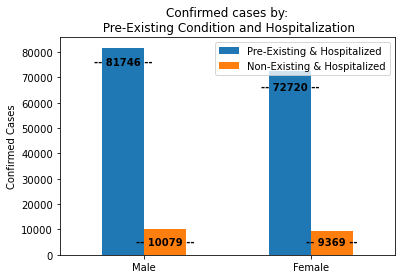

In [8]:
# Look at gender vs number of hospitalizations by pre-existing conditions
mhp = len(org_data_df.loc[(org_data_df["Gender"] == "Male") &
                      (org_data_df["Pre-Existing Condition"] == "Yes") &
                      (org_data_df["Hospitalized"] == "Yes")])
fhp = len(org_data_df.loc[(org_data_df["Gender"] == "Female") &
                      (org_data_df["Pre-Existing Condition"] == "Yes") &
                      (org_data_df["Hospitalized"] == "Yes")])

mhnp = len(org_data_df.loc[(org_data_df["Gender"] == "Male") &
                      (org_data_df["Pre-Existing Condition"] == "No") &
                      (org_data_df["Hospitalized"] == "Yes")])
fhnp = len(org_data_df.loc[(org_data_df["Gender"] == "Female") &
                      (org_data_df["Pre-Existing Condition"] == "No") &
                      (org_data_df["Hospitalized"] == "Yes")])
prex = ["Male", "Female"]
prex_df = pd.DataFrame({"Pre-Existing & Hospitalized" : [mhp,fhp], "Non-Existing & Hospitalized" : [mhnp,fhnp]}, index = prex)
ax = prex_df.plot(kind='bar', rot=0) 
ax.set_ylabel("Confirmed Cases")
ax.set_title("Confirmed cases by:\n Pre-Existing Condition and Hospitalization")

ax.legend(loc = "best")
plt.annotate(f"-- {mhp} --", xy=(0,80000), xytext=(-0.3,75000),color = "black", weight = "bold")
plt.annotate(f"-- {fhp} --",xy=(0,75000), xytext=(.7,65000), color = "black", weight = "bold")
plt.annotate(f"-- {mhnp} --", xy = (0,10000), xytext = (-0.045,4000), color = "black", weight = "bold")
plt.annotate(f"-- {fhnp} --", xy = (0,10000), xytext = (.97, 4000), color = "black", weight = "bold")

# prex_summary = pd.DataFrame([prex_df["Pre-Existing & Hospitalized"], prex_df["Non-Existing & Hospitalized"]],
#                             index=["Male", "Female"])

# plt.table(cellText=prex_summary.values,colWidths = [0.25]*len(prex_df.columns),
#           rowLabels=prex_summary.index,
#           colLabels=prex_df.columns,
#           cellLoc = 'center', rowLoc = 'center',
#           loc='right')

plt.savefig("../Images/MaleFemalePreXvsHosp.png")
total_males = mhp + mhnp
total_females = fhp + fhnp
percent_males = ("{:.2%}".format(mhp/total_males))
percent_females = ("{:.2%}".format(fhp/total_females))
prex_df["Pre-Existing & Hospitalized"] = prex_df["Pre-Existing & Hospitalized"].map("{:,.0f}".format)
prex_df["Non-Existing & Hospitalized"] = prex_df["Non-Existing & Hospitalized"].map("{:,.0f}".format)
prex_df["Hospitalized w/ Pre-Existing Condition %"] = [percent_males, percent_females]
prex_df